In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_excel("/Users/fikrialinfijar/Desktop/Perkuliahan/Python Notebook/Tugas SDI 3/OnlineRetail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [17]:
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  int64         
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.4+ MB


In [6]:
# Menghitung jumlah missing value pada setiap atribut
missing_values = df.isnull().sum()

# Menampilkan jumlah missing value pada setiap atribut
print("Jumlah missing value pada setiap atribut:")
print(missing_values)

Jumlah missing value pada setiap atribut:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Mengganti missing value pada atribut 'CustomerID' dengan nilai acak dari nilai yang ada
existing_customer_ids = df['CustomerID'].dropna().unique()
random_customer_id = np.random.choice(existing_customer_ids)
df['CustomerID'].fillna(random_customer_id, inplace=True)

# Menghilangkan baris dengan missing value pada atribut 'Description'
df.dropna(subset=['Description'], inplace=True)

# Menghilangkan baris dengan nilai negatif pada atribut 'Quantity'
df = df[df['Quantity'] >= 0]

# Menghilangkan baris dengan nilai 0 pada atribut 'UnitPrice'
df = df[df['UnitPrice'] > 0]
print (df.isnull(),sum)
print("Jumlah baris setelah preprocessing", len(df))

        InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice   
0           False      False        False     False        False      False  \
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  Country  
0            False   

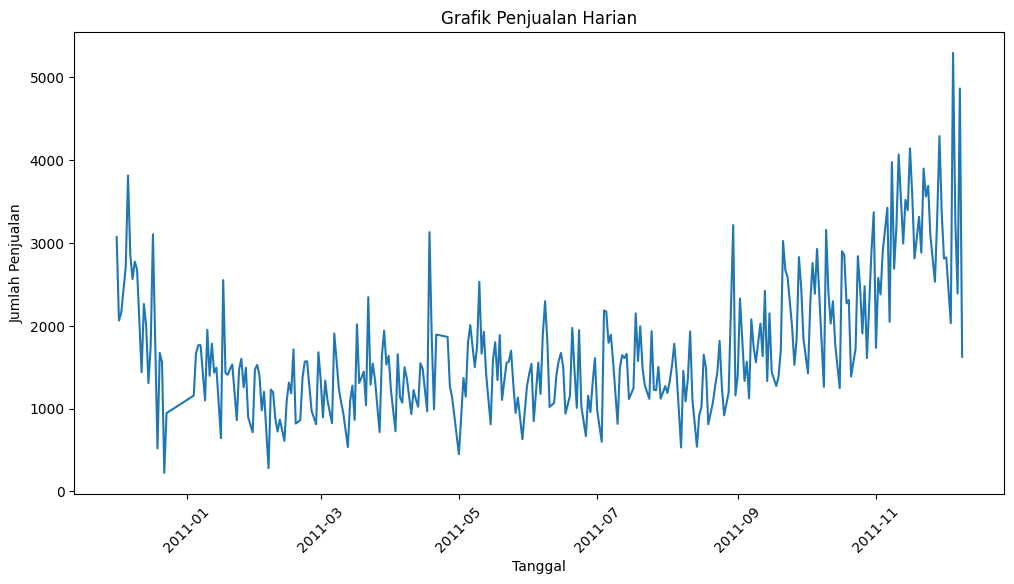

In [8]:
# Menghitung jumlah penjualan per tanggal
daily_sales = df.groupby(df['InvoiceDate'].dt.date).size()

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.title('Grafik Penjualan Harian')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Mengurutkan data berdasarkan "UnitPrice" secara menurun
top_10_prices = df.nlargest(10, 'UnitPrice')

# Menampilkan 10 nilai "UnitPrice" terbesar
print(top_10_prices['UnitPrice'])

15017     13541.33
299982    11062.06
173382     8142.75
297723     4505.17
268028     4287.63
422351     4161.06
422376     4161.06
406406     3949.32
374542     3155.95
347948     2653.95
Name: UnitPrice, dtype: float64


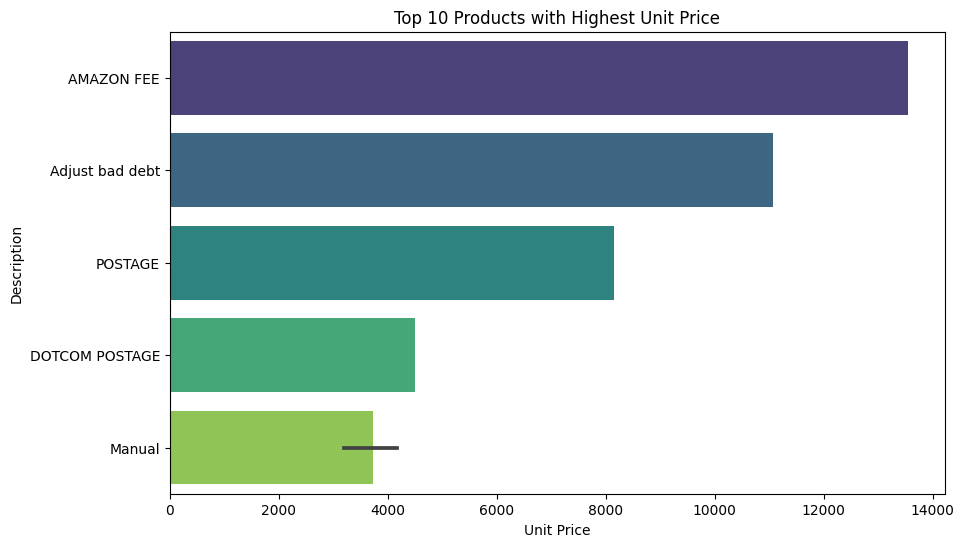

In [9]:

# Mengurutkan data berdasarkan "UnitPrice" secara menurun
sorted_data = df.sort_values(by='UnitPrice', ascending=False)

# Mengambil 10 data teratas
top_10_data = sorted_data.head(10)

# Memvisualisasikan 10 barang dengan "UnitPrice" terbesar
plt.figure(figsize=(10, 6))
sns.barplot(x='UnitPrice', y='Description', data=top_10_data, palette='viridis')
plt.xlabel('Unit Price')
plt.ylabel('Description')
plt.title('Top 10 Products with Highest Unit Price')
plt.show()


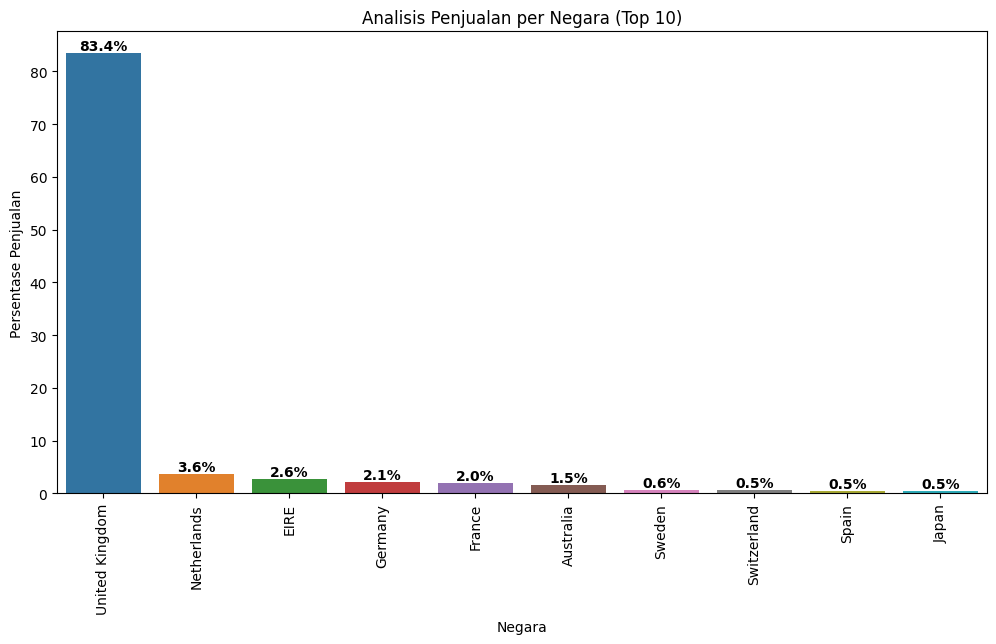

In [15]:
# Menghitung jumlah penjualan per negara
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Menghitung persentase penjualan per negara
sales_percentage = (sales_by_country / sales_by_country.sum()) * 100

# Memilih 10 negara teratas
top_10_countries = sales_percentage.head(10)

# Membuat bar chart dengan persentase
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.xlabel('Negara')
plt.ylabel('Persentase Penjualan')
plt.title('Analisis Penjualan per Negara (Top 10)')
plt.xticks(rotation=90)
for i, v in enumerate(top_10_countries.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.show()

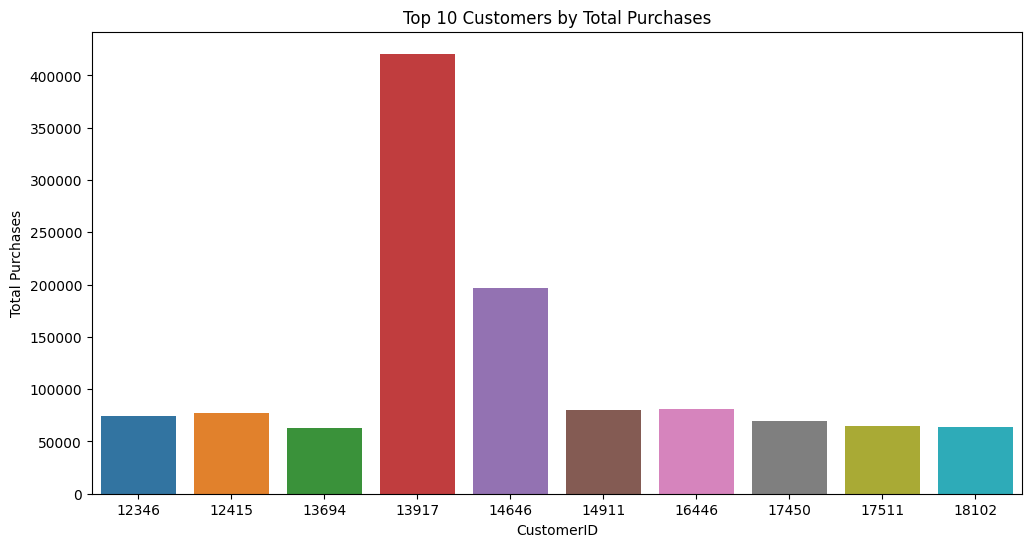

In [18]:

# Menghitung total pembelian untuk setiap CustomerID
customer_purchases = df.groupby('CustomerID')['Quantity'].sum().reset_index()

# Mengurutkan berdasarkan total pembelian secara menurun
top_10_customers = customer_purchases.nlargest(10, 'Quantity')

# Membuat visualisasi grafik bar
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='Quantity', data=top_10_customers)

# Mengatur label dan judul
plt.xlabel('CustomerID')
plt.ylabel('Total Purchases')
plt.title('Top 10 Customers by Total Purchases')

# Menampilkan plot
plt.show()


In [16]:

# Menghitung harga rata-rata setiap barang
item_prices = df.groupby('StockCode')['UnitPrice'].mean().reset_index()

# Mengurutkan berdasarkan harga rata-rata
item_prices = item_prices.sort_values(by='UnitPrice', ascending=False)

# Mengambil 10 nilai teratas
top_10_items = item_prices.head(10)

# Menampilkan 10 nilai teratas
print(top_10_items)


      StockCode     UnitPrice
3901          B  11062.060000
3900  AMAZONFEE   6880.545000
3911        DOT    292.137068
3912          M    230.860530
1621      22827    158.076923
1622      22828    156.428571
1456      22656    146.750000
1455      22655    143.421053
1617      22823    118.076923
1620      22826    114.024390


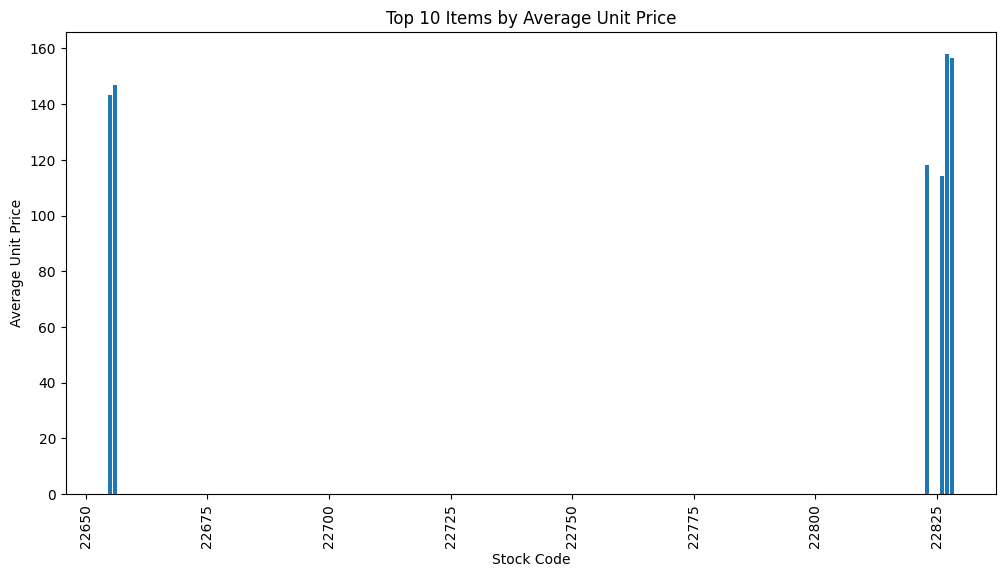

In [13]:

# Menghitung harga rata-rata setiap barang
item_prices = df.groupby('StockCode')['UnitPrice'].mean().reset_index()

# Mengonversi tipe data 'StockCode' menjadi numerik
item_prices['StockCode'] = pd.to_numeric(item_prices['StockCode'], errors='coerce')

# Mengurutkan berdasarkan harga rata-rata
item_prices = item_prices.sort_values(by='UnitPrice', ascending=False)

# Memilih 10 bar dengan harga rata-rata tertinggi
top_10_items = item_prices.head(10)

# Membuat visualisasi grafik bar
plt.figure(figsize=(12, 6))
plt.bar(top_10_items['StockCode'], top_10_items['UnitPrice'])
plt.xticks(rotation=90)
plt.xlabel('Stock Code')
plt.ylabel('Average Unit Price')
plt.title('Top 10 Items by Average Unit Price')
plt.show()


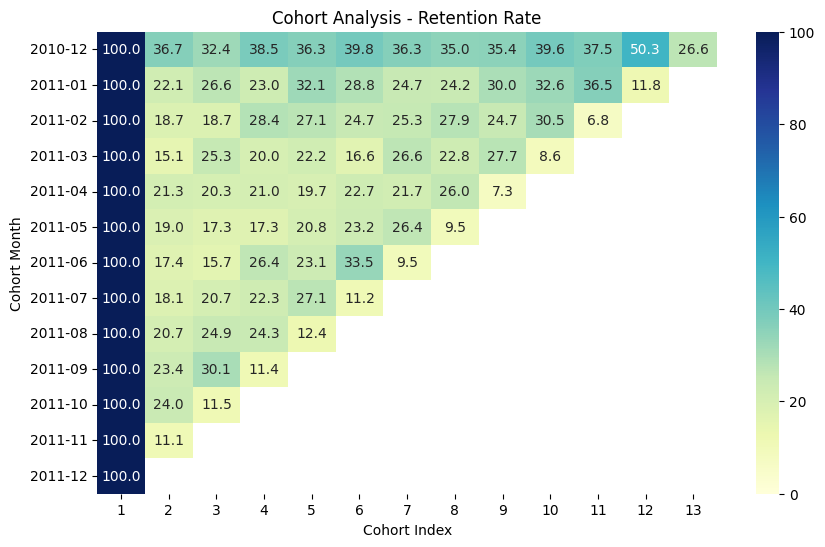

In [16]:
# Mengambil bulan dan tahun dari kolom InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Membuat tabel cohort berdasarkan bulan pertama kali pelanggan melakukan transaksi
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Menghitung rentang bulan antara tanggal transaksi dengan bulan cohort
df['CohortIndex'] = (df['InvoiceMonth'].dt.to_timestamp('M').dt.year - df['CohortMonth'].dt.to_timestamp('M').dt.year) * 12 + \
                    (df['InvoiceMonth'].dt.to_timestamp('M').dt.month - df['CohortMonth'].dt.to_timestamp('M').dt.month) + 1

# Membuat tabel retensi
cohort_retention = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_retention = cohort_retention.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Menghitung retensi dalam persentase
cohort_size = cohort_retention.iloc[:, 0]
retention = cohort_retention.divide(cohort_size, axis=0) * 100

# Membuat heatmap untuk visualisasi retensi
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(retention, annot=True, fmt='.1f', cmap='YlGnBu', vmin=0, vmax=100, cbar=True)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

Average Retention Rate:
CohortIndex
1     100.000000
2      20.631922
3      22.128344
4      23.255769
5      24.543458
6      25.094330
7      24.387862
8      24.278497
9      25.040512
10     27.850982
11     26.921576
12     31.044600
13     26.636569
dtype: float64


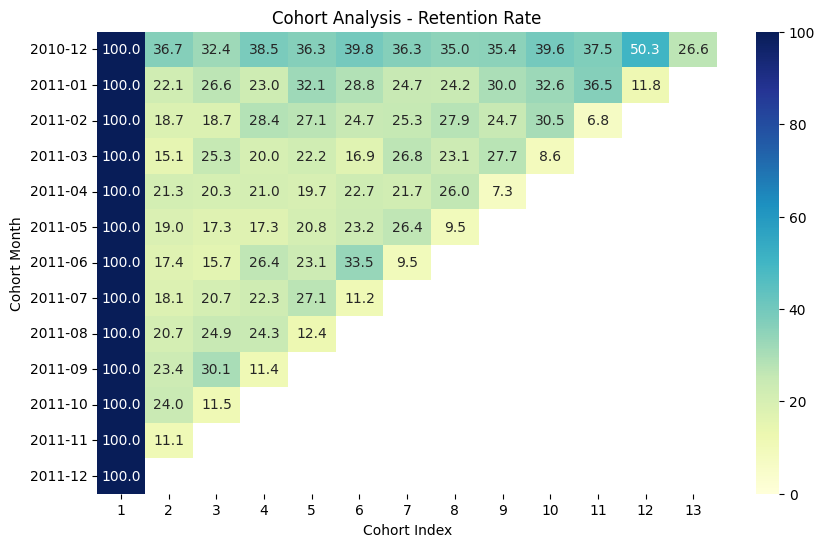

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil bulan dan tahun dari kolom InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Membuat tabel cohort berdasarkan bulan pertama kali pelanggan melakukan transaksi
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Menghitung rentang bulan antara tanggal transaksi dengan bulan cohort
df['CohortIndex'] = (df['InvoiceMonth'].dt.to_timestamp('M').dt.year - df['CohortMonth'].dt.to_timestamp('M').dt.year) * 12 + \
                    (df['InvoiceMonth'].dt.to_timestamp('M').dt.month - df['CohortMonth'].dt.to_timestamp('M').dt.month) + 1

# Membuat tabel retensi
cohort_retention = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_retention = cohort_retention.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Menghitung retensi dalam persentase
cohort_size = cohort_retention.iloc[:, 0]
retention = cohort_retention.divide(cohort_size, axis=0) * 100

# Menghitung jumlah rata-rata persentase retensi dari setiap index
average_retention = retention.mean()

# Menampilkan jumlah rata-rata persentase retensi dari setiap index
print("Average Retention Rate:")
print(average_retention)

# Menampilkan heatmap untuk visualisasi retensi beserta jumlah rata-rata persentase retensi
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(retention, annot=True, fmt='.1f', cmap='YlGnBu', vmin=0, vmax=100, cbar=True)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()


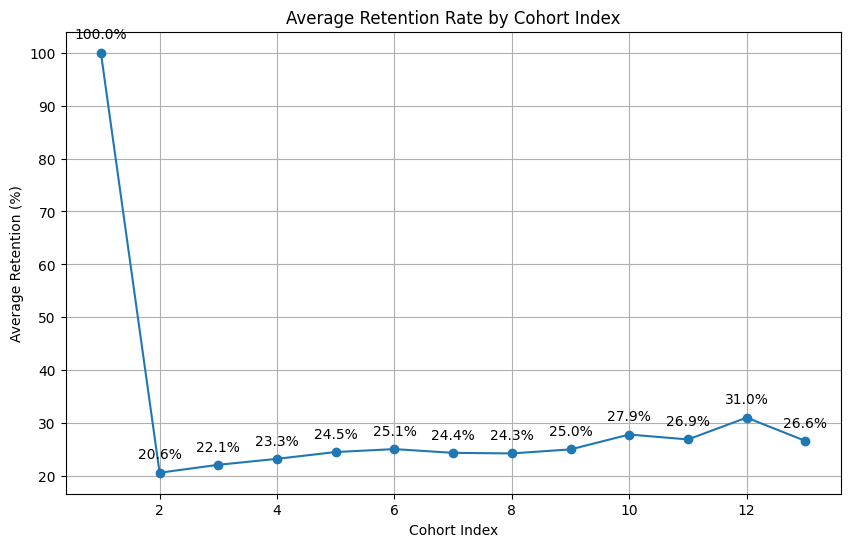

In [45]:
# Menghitung rata-rata retensi untuk setiap index
average_retention = retention.mean()

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(average_retention.index, average_retention.values, marker='o', linestyle='-')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Cohort Index')
plt.ylabel('Average Retention (%)')

# Menambahkan judul
plt.title('Average Retention Rate by Cohort Index')

# Menampilkan garis rata-rata sebagai anotasi pada titik-titik data
for x, y in zip(average_retention.index, average_retention.values):
    plt.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()


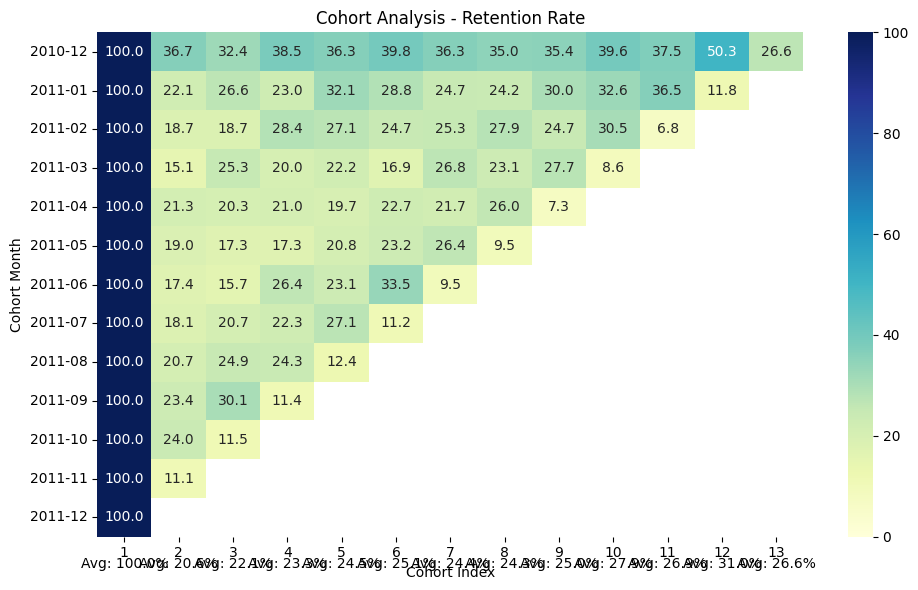

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil bulan dan tahun dari kolom InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Membuat tabel cohort berdasarkan bulan pertama kali pelanggan melakukan transaksi
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Menghitung rentang bulan antara tanggal transaksi dengan bulan cohort
df['CohortIndex'] = (df['InvoiceMonth'].dt.to_timestamp('M').dt.year - df['CohortMonth'].dt.to_timestamp('M').dt.year) * 12 + \
                    (df['InvoiceMonth'].dt.to_timestamp('M').dt.month - df['CohortMonth'].dt.to_timestamp('M').dt.month) + 1

# Membuat tabel retensi
cohort_retention = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_retention = cohort_retention.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Menghitung retensi dalam persentase
cohort_size = cohort_retention.iloc[:, 0]
retention = cohort_retention.divide(cohort_size, axis=0) * 100

# Menghitung jumlah rata-rata persentase retensi dari setiap index
average_retention = retention.mean()

# Menampilkan heatmap untuk visualisasi retensi beserta jumlah rata-rata persentase retensi
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(retention, annot=True, fmt='.1f', cmap='YlGnBu', vmin=0, vmax=100, cbar=True)
for i, avg_retention in enumerate(average_retention):
    plt.text(i + 0.5, retention.shape[0] + 0.8, f'Avg: {avg_retention:.1f}%', ha='center')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()


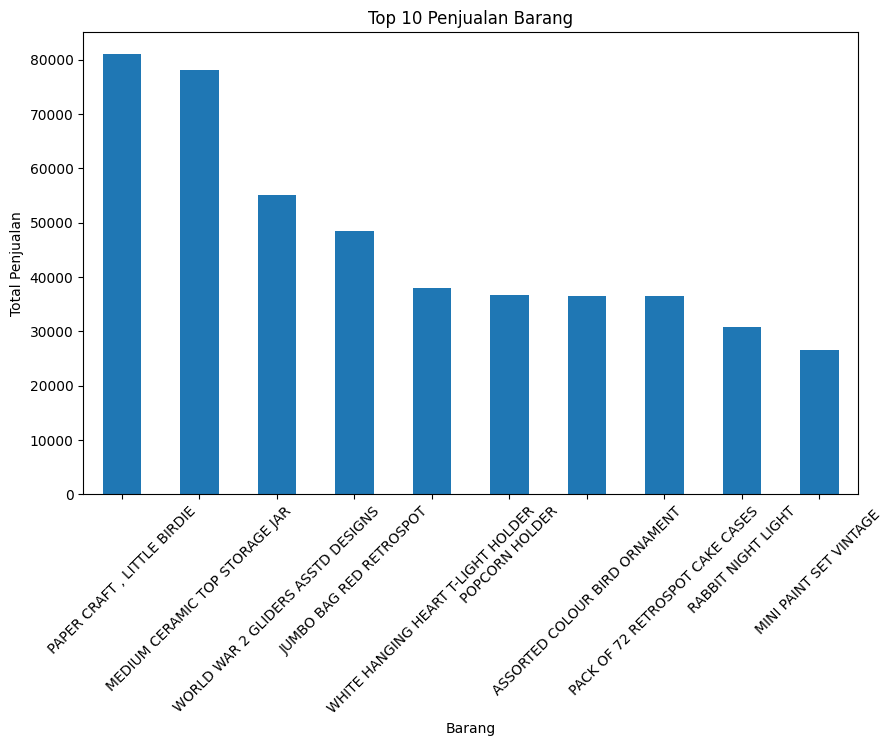

In [17]:
# Menghitung total penjualan per barang
top_10_sales = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
top_10_sales.plot(kind='bar')
plt.title('Top 10 Penjualan Barang')
plt.xlabel('Barang')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Menghitung jumlah pembelian untuk setiap pelanggan
customer_purchase_count = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Mengidentifikasi pelanggan yang melakukan lebih dari satu pembelian
repeat_customers = customer_purchase_count[customer_purchase_count > 1]

# Menampilkan 10 pelanggan dengan pembelian terbanyak
top_10_repeat_customers = repeat_customers.nlargest(10)

# Menampilkan hasil
print(top_10_repeat_customers)


CustomerID
13917.0    1430
12748.0     209
14911.0     201
17841.0     124
13089.0      97
14606.0      93
15311.0      91
12971.0      86
14646.0      73
16029.0      63
Name: InvoiceNo, dtype: int64


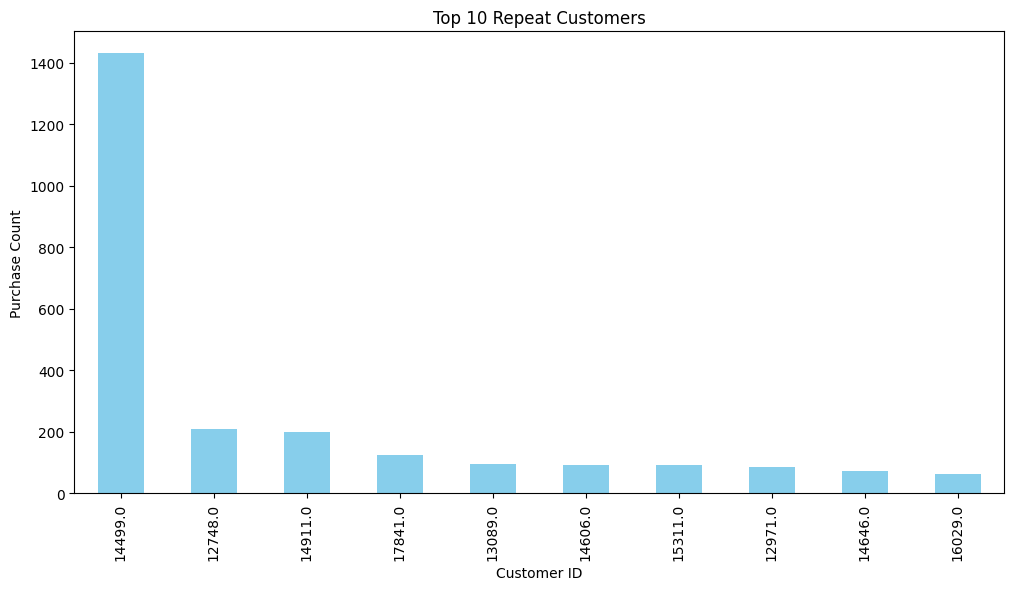

In [13]:

# Menghitung jumlah pembelian untuk setiap pelanggan
customer_purchase_count = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Mengidentifikasi pelanggan yang melakukan lebih dari satu pembelian
repeat_customers = customer_purchase_count[customer_purchase_count > 1]

# Mengurutkan pelanggan berdasarkan jumlah pembelian terbanyak
top_10_repeat_customers = repeat_customers.nlargest(10)

# Membuat visualisasi grafik bar
plt.figure(figsize=(12, 6))
top_10_repeat_customers.plot(kind='bar', color='skyblue')

# Mengatur label dan judul
plt.xlabel('Customer ID')
plt.ylabel('Purchase Count')
plt.title('Top 10 Repeat Customers')

# Menampilkan grafik
plt.show()


In [27]:
import pandas as pd

# Mengurutkan data berdasarkan CustomerID dan InvoiceDate
sorted_df = df.sort_values(['CustomerID', 'InvoiceDate'])

# Menghitung jumlah pembelian untuk setiap pelanggan
customer_purchase_counts = sorted_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Mengidentifikasi repeat customer (dengan minimal 2 pembelian)
repeat_customers = customer_purchase_counts[customer_purchase_counts >= 2]

# Menampilkan informasi repeat customer
print("Informasi Repeat Customer:")
print(repeat_customers)

# Menghitung jumlah repeat customer
num_repeat_customers = len(repeat_customers)

# Menampilkan jumlah repeat customer
print("Jumlah Repeat Customer:", num_repeat_customers)


Informasi Repeat Customer:
CustomerID
12347.0     7
12348.0     4
12352.0     8
12356.0     3
12358.0     2
           ..
18272.0     6
18273.0     3
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 2845, dtype: int64
Jumlah Repeat Customer: 2845


In [29]:
import pandas as pd

# Mengurutkan data berdasarkan CustomerID dan InvoiceDate
sorted_df = df.sort_values(['CustomerID', 'InvoiceDate'])

# Menghitung jumlah pembelian untuk setiap pelanggan
customer_purchase_counts = sorted_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Mengidentifikasi repeat customer (dengan minimal 2 pembelian)
repeat_customers = customer_purchase_counts[customer_purchase_counts >= 2]

# Mengurutkan repeat customer berdasarkan jumlah pembelian secara menurun
top_10_repeat_customers = repeat_customers.nlargest(10)

# Menampilkan repeat customer teratas
print("Top 10 Repeat Customers:")
print(top_10_repeat_customers)


Top 10 Repeat Customers:
CustomerID
14499.0    1431
12748.0     209
14911.0     201
17841.0     124
13089.0      97
14606.0      93
15311.0      91
12971.0      86
14646.0      73
16029.0      63
Name: InvoiceNo, dtype: int64


In [30]:
import pandas as pd

# Seleksi kolom customer_id dan country
selected_data = df[['CustomerID', 'Country']]

# Mengelompokkan berdasarkan customer_id dan country, dan menghitung jumlah kemunculan
grouped_data = selected_data.groupby(['CustomerID', 'Country']).size().reset_index(name='Count')

# Mengurutkan berdasarkan jumlah kemunculan secara menurun
sorted_data = grouped_data.sort_values('Count', ascending=False)

# Menampilkan hasil
print(sorted_data)


      CustomerID         Country   Count
1595     14499.0  United Kingdom  130996
4026     17841.0  United Kingdom    7847
1895     14911.0            EIRE    5675
1297     14096.0  United Kingdom    5111
334      12748.0  United Kingdom    4595
...          ...             ...     ...
2045     15118.0  United Kingdom       1
1045     13747.0  United Kingdom       1
2760     16093.0  United Kingdom       1
2750     16078.0  United Kingdom       1
0        12346.0  United Kingdom       1

[4354 rows x 3 columns]


In [36]:
import pandas as pd

# Seleksi kolom customer_id dan country
selected_data = df[['CustomerID', 'Country']]

# Mengelompokkan berdasarkan customer_id dan country, dan menghitung jumlah kemunculan
grouped_data = selected_data.groupby(['CustomerID', 'Country']).size().reset_index(name='Count')

# Mengurutkan berdasarkan jumlah kemunculan secara menurun
sorted_data = grouped_data.sort_values('Count', ascending=False)

# Menampilkan 10 data teratas
top_10_data = sorted_data.head(10)
print(top_10_data)


      CustomerID         Country   Count
1595     14499.0  United Kingdom  130996
4026     17841.0  United Kingdom    7847
1895     14911.0            EIRE    5675
1297     14096.0  United Kingdom    5111
334      12748.0  United Kingdom    4595
1677     14606.0  United Kingdom    2700
2192     15311.0  United Kingdom    2379
1705     14646.0     Netherlands    2076
570      13089.0  United Kingdom    1818
698      13263.0  United Kingdom    1677


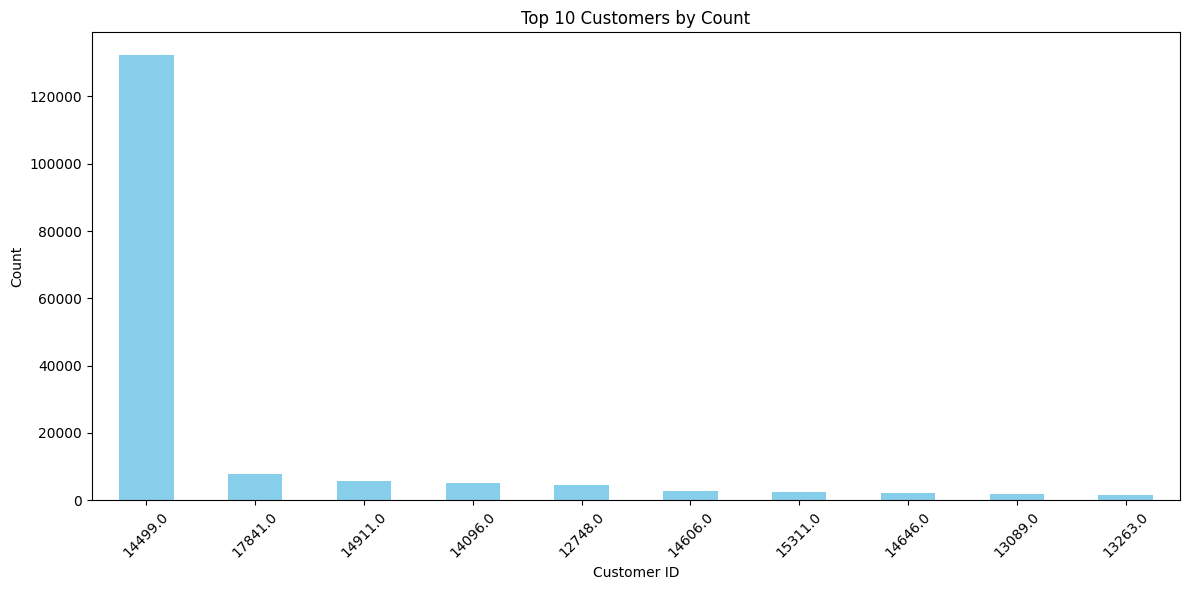

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah kemunculan untuk setiap CustomerID
customer_count = df['CustomerID'].value_counts()

# Mengambil 10 customer dengan kemunculan terbanyak
top_10_customers = customer_count.head(10)

# Membuat visualisasi grafik bar
plt.figure(figsize=(12, 6))
top_10_customers.plot(kind='bar', color='skyblue')

# Mengatur label dan judul
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.title('Top 10 Customers by Count')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


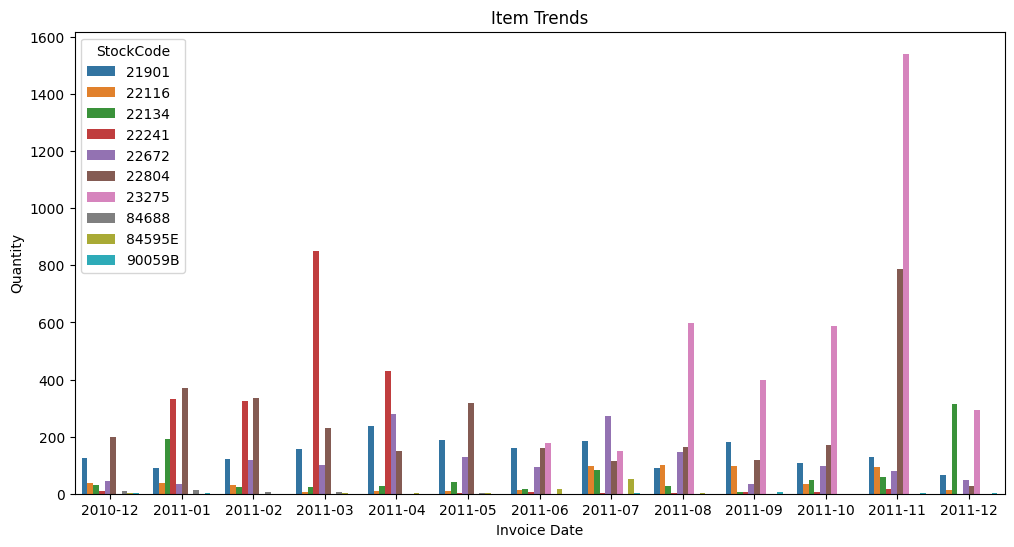

In [25]:

# Agregasi data penjualan berdasarkan produk dan periode waktu
item_trends = df.groupby(['StockCode', df['InvoiceDate'].dt.to_period('M')])['Quantity'].sum().reset_index()

# Memilih beberapa produk secara acak
random_products = item_trends['StockCode'].sample(n=10, random_state=42)

# Filter data berdasarkan produk yang dipilih
filtered_trends = item_trends[item_trends['StockCode'].isin(random_products)]

# Membuat visualisasi grafik bar
plt.figure(figsize=(12, 6)) 
sns.barplot(x='InvoiceDate', y='Quantity', hue='StockCode', data=filtered_trends)
plt.xlabel('Invoice Date')
plt.ylabel('Quantity')
plt.title('Item Trends')
plt.legend(title='StockCode')
plt.show()


In [44]:
# Seleksi kolom customer_id dan country
selected_data = df[['CustomerID', 'Country']]

# Mengelompokkan berdasarkan customer_id dan country, dan menghitung jumlah kemunculan
grouped_data = selected_data.groupby(['CustomerID', 'Country']).size().reset_index(name='Count')

# Mengurutkan berdasarkan jumlah kemunculan secara menurun
sorted_data = grouped_data.sort_values('Count', ascending=False)

# Menampilkan 10 data teratas
top_15_data = sorted_data.head(15)
print(top_15_data)

      CustomerID         Country   Count
1595     14499.0  United Kingdom  130996
4026     17841.0  United Kingdom    7847
1895     14911.0            EIRE    5675
1297     14096.0  United Kingdom    5111
334      12748.0  United Kingdom    4595
1677     14606.0  United Kingdom    2700
2192     15311.0  United Kingdom    2379
1705     14646.0     Netherlands    2076
570      13089.0  United Kingdom    1818
698      13263.0  United Kingdom    1677
1442     14298.0  United Kingdom    1637
1980     15039.0  United Kingdom    1502
1341     14156.0            EIRE    1400
4229     18118.0  United Kingdom    1279
1344     14159.0  United Kingdom    1204
